<a href="https://colab.research.google.com/github/Hero0963/data_science/blob/main/data_science_ch05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# exercise_01

# read penguin data
from google.colab import drive
drive.mount('/content/MyGoogleDrive')
import pandas as pd
df=pd.read_csv('/content/MyGoogleDrive/My Drive/Colab Notebooks/Python-for-Titanic/Ch05/penguin.csv')
df.info()

Mounted at /content/MyGoogleDrive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                332 non-null    int64  
 1   Length_cm         332 non-null    float64
 2   Weight_g          332 non-null    float64
 3   Species           332 non-null    object 
 4   Scientific Name   332 non-null    object 
 5   Inspector         332 non-null    object 
 6   Measurement Date  332 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 18.3+ KB


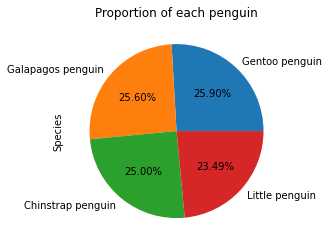

In [2]:
# count each species' value and plot pie graph
count_species=df['Species'].value_counts()
count_species.plot(kind='pie',title='Proportion of each penguin', autopct='%.2f%%')

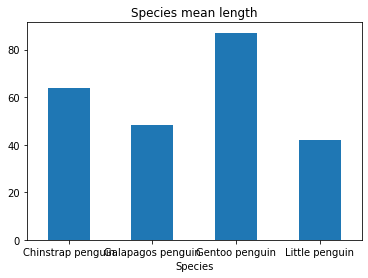

In [3]:
# plot Length_cm bar graph 
maen_l=df.groupby(['Species'])['Length_cm'].mean()
# print(type(maen_l))

maen_l.plot(kind='bar',rot=0,y='unit:cm' , title='Species mean length')

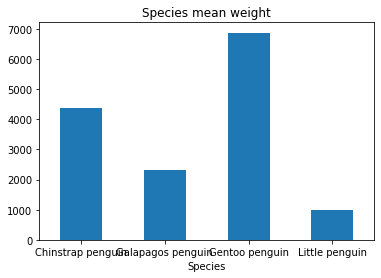

In [5]:
# plot Weight_g bar graph 
maen_w=df.groupby(['Species'])['Weight_g'].mean()
maen_w.plot(kind='bar',rot=0,y='unit:g' , title='Species mean weight')

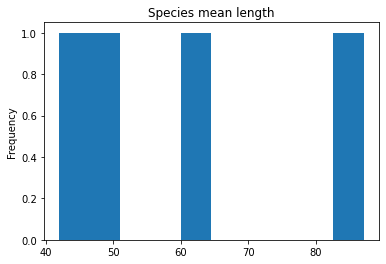

In [6]:
# plot Length_cm hist graph
maen_l=df.groupby(['Species'])['Length_cm'].mean()
maen_l.plot(kind='hist',rot=0,y='unit:cm' , title='Species mean length')

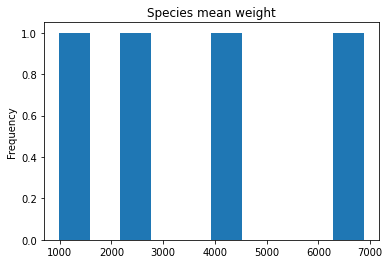

In [7]:
# plot Weight_g hist graph
maen_w=df.groupby(['Species'])['Weight_g'].mean()
maen_w.plot(kind='hist',rot=0,y='unit:g' , title='Species mean weight')

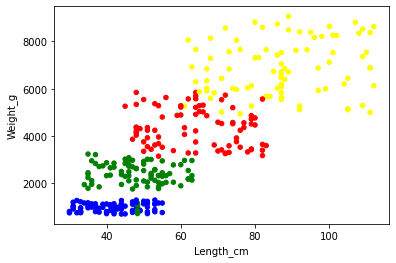

In [8]:
# plot Length_cm-Weight_g scatter pragh
c={'Chinstrap penguin':'red','Little penguin':'blue','Galapagos penguin':'green','Gentoo penguin':'yellow',}
df['colors']=df['Species'].map(c)

df.plot(kind='scatter',x='Length_cm',y='Weight_g',c=df['colors'])

In [9]:
df.to_csv('/content/MyGoogleDrive/My Drive/Colab Notebooks/Python_Data_Science/penguin05.csv',index=False)

In [10]:
# exercise_02

# read shoesize data
from google.colab import drive
drive.mount('/content/MyGoogleDrive')
import pandas as pd
df=pd.read_csv('/content/MyGoogleDrive/My Drive/Colab Notebooks/Python-for-Titanic/Ch05/ShoeSize.csv')
df.info()

Drive already mounted at /content/MyGoogleDrive; to attempt to forcibly remount, call drive.mount("/content/MyGoogleDrive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            300 non-null    int64  
 1   Gender        300 non-null    object 
 2   Height_cm     300 non-null    int64  
 3   Weight_kg     300 non-null    int64  
 4   Shoe size_cm  300 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 11.8+ KB


In [11]:
df['BMI']= df['Weight_kg'] / ((df['Height_cm']/100.0)**2)
# df['BMI']

bmi_order=['under_weight','fit','over_wight']

bmi_under_weight=18.5
bmi_over_wight=24

df_gender=df.groupby('Gender')

In [22]:
# count by bmi 
df_male=df_gender.get_group('Male')
# print(type(df_male))
print(df_male['ID'].count())

under_weight_count=df_male['ID'][df_male['BMI']<bmi_under_weight].count()
fit_count=df_male['ID'][df_male['BMI'].between(bmi_under_weight,bmi_over_wight)].count()+df_male['ID'][df_male['BMI']==bmi_under_weight].count()
over_weight_count=df_male['ID'][df_male['BMI']>=bmi_over_wight].count()
mb=[under_weight_count,fit_count,over_weight_count]
mb

167


[12, 2, 153]

In [23]:
df_female=df_gender.get_group('Female')
print(df_female['ID'].count())

under_weight_count=df_female['ID'][df_female['BMI']<bmi_under_weight].count()
fit_count=df_female['ID'][df_female['BMI'].between(bmi_under_weight,bmi_over_wight)].count()+df_female['ID'][df_female['BMI']==bmi_under_weight].count()
over_weight_count=df_female['ID'][df_female['BMI']>=bmi_over_wight].count()
fmb=[under_weight_count,fit_count,over_weight_count]
fmb

133


[2, 65, 66]

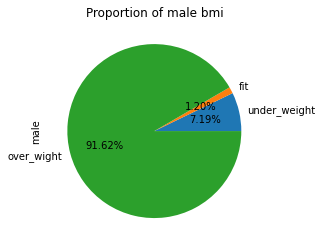

In [24]:
# plot bar graph
df_bmi=pd.DataFrame() 
df_bmi.index=bmi_order
df_bmi['male']=mb
df_bmi['female']=fmb

df_bmi['male'].plot(kind='pie',title='Proportion of male bmi', autopct='%.2f%%')

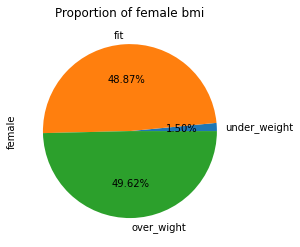

In [25]:
df_bmi['female'].plot(kind='pie',title='Proportion of female bmi', autopct='%.2f%%')

In [ ]:
# note:  
# syntax error: bmi_under_weight<= df_male['BMI']<bmi_over_wight   
# groupby gender
# ref= https://ithelp.ithome.com.tw/users/20107514/ironman/1399

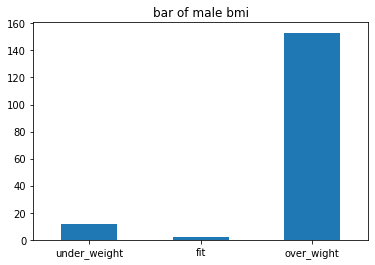

In [29]:
df_bmi['male']
df_bmi['male'].plot(kind='bar', rot=0 , title='bar of male bmi')

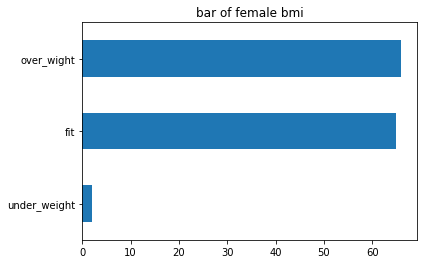

In [28]:
df_bmi['female']
df_bmi['female'].plot(kind='barh',title='bar of female bmi')

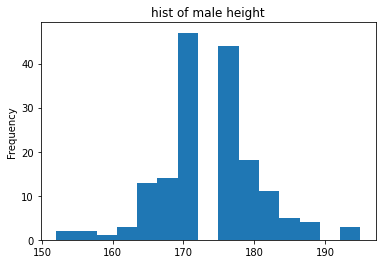

In [30]:
df_male['Height_cm'].plot(kind='hist',title='hist of male height',bins=15)

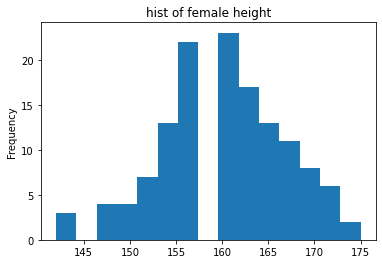

In [31]:
df_female['Height_cm'].plot(kind='hist',title='hist of female height',bins=15)

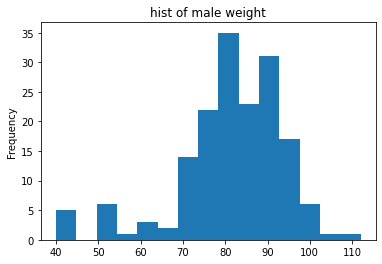

In [32]:
df_male['Weight_kg'].plot(kind='hist',title='hist of male weight',bins=15)

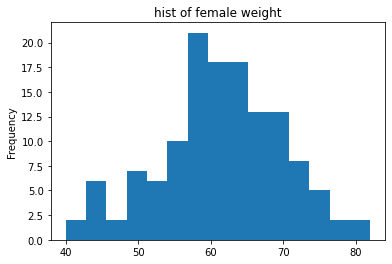

In [33]:
df_female['Weight_kg'].plot(kind='hist',title='hist of female weight',bins=15)

21
      ID  Gender  Height_cm  Weight_kg  Shoe size_cm        BMI   colors
0      1    Male        175         56          28.0  18.285714  #77E80E
1      2    Male        195        112          31.0  29.454306  #B647AE
2      3    Male        175         90          28.5  29.387755  #8CB36C
3      4  Female        154         40          22.5  16.866251  #FF0CA1
4      5  Female        154         58          22.5  24.456063  #FF0CA1
..   ...     ...        ...        ...           ...        ...      ...
295  296    Male        170         84          27.0  29.065744  #BA0CED
296  297    Male        175         76          28.5  24.816327  #8CB36C
297  298    Male        175         82          28.5  26.775510  #8CB36C
298  299    Male        152         60          25.0  25.969529  #5CE6FF
299  300  Female        172         69          25.5  23.323418  #CDF497

[300 rows x 7 columns]


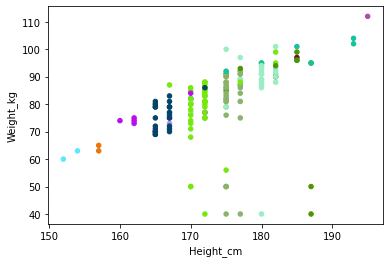

In [34]:
from random import randint
shoe_size_list=df['Shoe size_cm'].unique().tolist()
# print(shoe_size_list)
# print(type(shoe_size_list))
n=len(shoe_size_list)
colors_list=[]
for i in range(n):
  colors_list.append('#%06X' % randint(0, 0xFFFFFF))
                                    
# colors_list
color_converter = dict(zip(shoe_size_list, colors_list))
print(len(color_converter))

df['colors']=df['Shoe size_cm'].map(color_converter)
print(df)

df[df.Gender=='Male'].plot(kind='scatter',x='Height_cm',y='Weight_kg',c=df[df.Gender=='Male']['colors'])

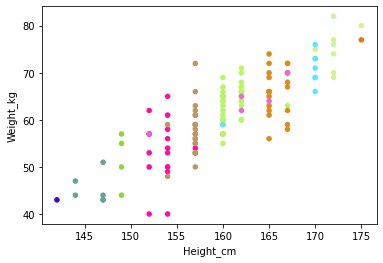

In [35]:
df[df.Gender=='Female'].plot(kind='scatter',x='Height_cm',y='Weight_kg',c=df[df.Gender=='Female']['colors'])

In [36]:
df.to_csv('/content/MyGoogleDrive/My Drive/Colab Notebooks/Python_Data_Science/shoesize05.csv',index=False)